In [1]:
import pandas as pd
features = pd.read_csv('features.csv', index_col='match_id')
features_test = pd.read_csv('features_test.csv', index_col='match_id')
features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


# PART I 
## 1) 
###удалить:
#### duration: длительность
#### radiant_win: 1, если победила команда Radiant, 0 — иначе
#### Состояние башен и барраков к концу матча (см. описание полей набора данных)
#### tower_status_radiant
#### tower_status_dire
#### barracks_status_radiant
#### barracks_status_dire

In [2]:
X_train = features.drop(['duration', 'radiant_win', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire' ], axis = 1)

## 2) Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.

In [3]:
for i in X_train.columns:
    if X_train[i].isna().sum() != 0:
        print('Number of nan-values in ', i, 'is: ', X_train[i].isna().sum())

Number of nan-values in  first_blood_time is:  19553
Number of nan-values in  first_blood_team is:  19553
Number of nan-values in  first_blood_player1 is:  19553
Number of nan-values in  first_blood_player2 is:  43987
Number of nan-values in  radiant_bottle_time is:  15691
Number of nan-values in  radiant_courier_time is:  692
Number of nan-values in  radiant_flying_courier_time is:  27479
Number of nan-values in  radiant_first_ward_time is:  1836
Number of nan-values in  dire_bottle_time is:  16143
Number of nan-values in  dire_courier_time is:  676
Number of nan-values in  dire_flying_courier_time is:  26098
Number of nan-values in  dire_first_ward_time is:  1826


## 3) Замените пропуски на нули с помощью функции fillna().

In [4]:
X_train = X_train.fillna(0)
X_test = features_test.fillna(0)

## 4) Какой столбец содержит целевую переменную? Запишите его название.
#### - radiant_win

In [5]:
y = features['radiant_win'].values

## 5) Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30).

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics
from tqdm import tqdm
from statistics import mean
import time
import datetime

In [13]:
kf = KFold(n_splits= 5, random_state = 1, shuffle = True)

In [15]:
scores_GBC = dict()
time_GBC = dict()
for i in [10, 20, 30, 40, 50]:
    scores_GBC[i], time_GBC[i] = 0, 0
    GBC = GradientBoostingClassifier( n_estimators=i, verbose=True)
    start_time = datetime.datetime.now()
    score = cross_val_score(GBC, X_train, y, cv = kf, scoring = 'roc_auc')
    scores_GBC[i] = round(mean(score),4)
    time_GBC[i] = datetime.datetime.now() - start_time

Iter       Train Loss   Remaining Time 
         1           1.3783            6.41s
         2           1.3727            5.82s
         3           1.3678            5.05s
         4           1.3631            4.35s
         5           1.3584            3.62s
         6           1.3544            2.88s
         7           1.3499            2.17s
         8           1.3456            1.44s
         9           1.3417            0.72s
        10           1.3379            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3784            6.44s
         2           1.3730            5.73s
         3           1.3678            4.97s
         4           1.3634            4.27s
         5           1.3590            3.56s
         6           1.3544            2.84s
         7           1.3502            2.14s
         8           1.3457            1.42s
         9           1.3417            0.71s
        10           1.3381            0.00s
      Iter    

In [18]:
for i,j in scores_GBC.items():
    print('ROC-AUC for', i, 'trees is :', str(j)+'\n', 
            'Time for', i, 'trees is :', time_GBC[i])

ROC-AUC for 10 trees is : 0.6648
 Time for 10 trees is : 0:00:37.108243
ROC-AUC for 20 trees is : 0.6821
 Time for 20 trees is : 0:01:20.862779
ROC-AUC for 30 trees is : 0.6897
 Time for 30 trees is : 0:01:49.451091
ROC-AUC for 40 trees is : 0.6939
 Time for 40 trees is : 0:02:22.526178
ROC-AUC for 50 trees is : 0.6971
 Time for 50 trees is : 0:02:57.431278


# PART II

## 1) Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C).

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from tqdm import tqdm
from statistics import mean

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [22]:
scores_log = dict()
for c in tqdm([0.1,1,2,5,10]):
    scores_log[c] = 0
    log_reg = LogisticRegression( penalty='l2', C = c)
    score = cross_val_score(log_reg, X_train_scaled, y, cv = kf, scoring = 'roc_auc')
    scores_log[c] = round(mean(score), 4)

100%|██████████| 5/5 [00:13<00:00,  2.69s/it]


In [24]:
max_key = max(scores_log, key=scores_log.get)
print(scores_log,'\n')
print('The best ROC-AUC score is with C=', max_key)

{0.1: 0.7164, 1: 0.7163, 2: 0.7163, 5: 0.7163, 10: 0.7163} 

The best ROC-AUC score is with C= 0.1


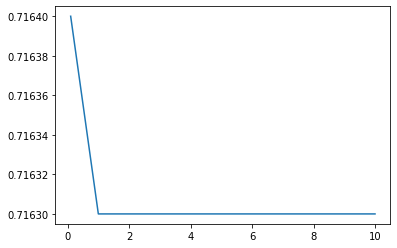

In [25]:
import matplotlib.pyplot as plt
lists = sorted(scores_log.items())
x, y1 = zip(*lists)
plt.plot(x, y1)
plt.show()

## 2) Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации.

In [26]:
X_train_clear = X_train.drop(['lobby_type','r1_hero' , 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], axis = 1)
X_train_clear_scaled = scaler.fit_transform(X_train_clear)

In [29]:
scores_log_clear = dict()
for c in tqdm([0.1,1,2,5,10]):
    scores_log_clear[c] = 0
    log_reg_2 = LogisticRegression( penalty='l2', C = c)
    score = cross_val_score(log_reg_2, X_train_clear_scaled, y, cv = kf, scoring = 'roc_auc')
    scores_log_clear[c] = round(mean(score), 4)

100%|██████████| 5/5 [00:12<00:00,  2.46s/it]


In [31]:
max_key = max(scores_log_clear, key=scores_log_clear.get)
print(scores_log_clear,'\n')
print('The best ROC-AUC score is with C=', max_key)

{0.1: 0.7164, 1: 0.7164, 2: 0.7164, 5: 0.7164, 10: 0.7164} 

The best ROC-AUC score is with C= 0.1


## 3) На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре

In [32]:
for i in range(1,6):
    print('d'+str(i)+'_hero values',len(features['r'+str(i)+'_hero'].unique().tolist()))

d1_hero values 108
d2_hero values 108
d3_hero values 108
d4_hero values 108
d5_hero values 108


## 4) Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

In [40]:
X_pick = np.zeros((X_train.shape[0], 112))
for i, match_id in enumerate(X_train.index):
    for p in range(5):
        X_pick[i, X_train.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, X_train.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

In [41]:
X_train_clear_2 = np.concatenate((X_train_clear.values, X_pick), axis=1)

In [42]:
X_train_clear_2_scaled = scaler.fit_transform(X_train_clear_2)

In [44]:
scores_log_clear_2 = dict()
for c in tqdm([0.1,1,2,5,10]):
    scores_log_clear[c] = 0
    log_reg = LogisticRegression( penalty='l2', C = c)
    score = cross_val_score(log_reg, X_train_clear_2_scaled, y, cv = kf, scoring = 'roc_auc')
    scores_log_clear_2[c] = round(mean(score), 4)

100%|██████████| 5/5 [00:24<00:00,  4.94s/it]


## 5) Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации.
### Точность лог.рег после bag of words

In [45]:
max_key = max(scores_log_clear_2, key=scores_log_clear_2.get)
print(scores_log_clear_2,'\n')
print('The best ROC-AUC score is with C=', max_key)

{0.1: 0.7519, 1: 0.7519, 2: 0.7519, 5: 0.7519, 10: 0.7519} 

The best ROC-AUC score is with C= 0.1


## 6) Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации)

In [46]:
X_pick_test = np.zeros((X_test.shape[0], 112))
for i, match_id in enumerate(X_test.index):
    for p in range(5):
        X_pick_test[i, X_test.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_test[i, X_test.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

In [47]:
X_test_clear = X_test.drop(['lobby_type','r1_hero' , 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero'], axis = 1)
X_test_bag = np.concatenate((X_test_clear.values, X_pick_test), axis=1)
X_test_bag =  scaler.fit_transform(X_test_bag)

In [50]:
log_reg = LogisticRegression( penalty='l2', C = 0.1)
log_reg.fit(X_train_clear_2_scaled, y)
test_pred = log_reg.predict_proba(X_test_bag)
test_pred

array([[0.17525657, 0.82474343],
       [0.24168316, 0.75831684],
       [0.8128029 , 0.1871971 ],
       ...,
       [0.76857943, 0.23142057],
       [0.36805462, 0.63194538],
       [0.57369078, 0.42630922]])

In [51]:
print('min value for radiant win is', round(min(test_pred[:,1]), 4))
print('max value for radiant win is', round(max(test_pred[:,1]),4))

min value for radiant win is 0.0087
max value for radiant win is 0.9965


In [52]:
final =pd.Series(test_pred[:,1], index = X_test.index)
final

match_id
6         0.824743
7         0.758317
10        0.187197
13        0.859135
16        0.237983
            ...   
114369    0.720258
114377    0.632606
114378    0.231421
114393    0.631945
114398    0.426309
Length: 17177, dtype: float64

In [104]:
final.to_csv('final.csv')